### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
auto_data = pd.read_csv("bmw.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [3]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [4]:
auto_data[auto_data.engineSize==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
621,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,0.0
778,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,0.0
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0
1866,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,0.0
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,0.0
3277,i3,2016,16482,Automatic,43695,Hybrid,0,470.8,0.0
3628,i3,2015,14285,Automatic,65800,Hybrid,0,470.8,0.0
3913,i3,2017,18500,Automatic,36429,Hybrid,0,470.8,0.0
4100,i3,2017,19495,Automatic,17338,Hybrid,135,470.8,0.0
4109,i3,2015,17481,Automatic,9886,Hybrid,0,470.8,0.0


In [5]:
auto_data['engineSize'][auto_data.engineSize==0].count()

47

In [6]:
auto_data = auto_data[auto_data.engineSize > 0]
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


Проверка остальных значений на выбросы

<AxesSubplot:xlabel='model', ylabel='count'>

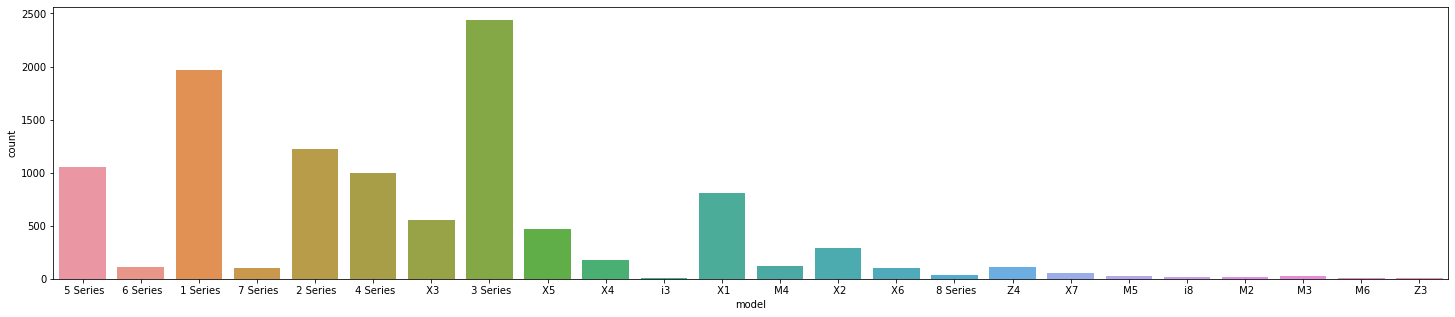

In [7]:
_, axes = plt.subplots(figsize=(25, 5))
sns.countplot(x='model', data=auto_data)

<AxesSubplot:xlabel='fuelType', ylabel='count'>

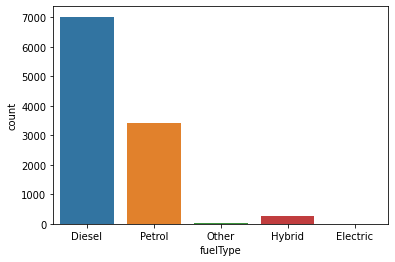

In [8]:
sns.countplot(x='fuelType', data=auto_data)

<AxesSubplot:xlabel='transmission', ylabel='count'>

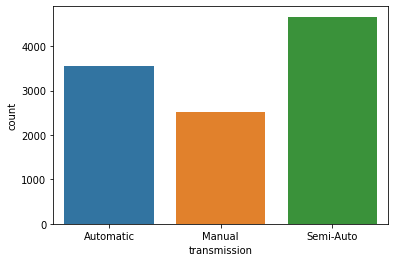

In [9]:
sns.countplot(x='transmission', data=auto_data)

<AxesSubplot:xlabel='year', ylabel='count'>

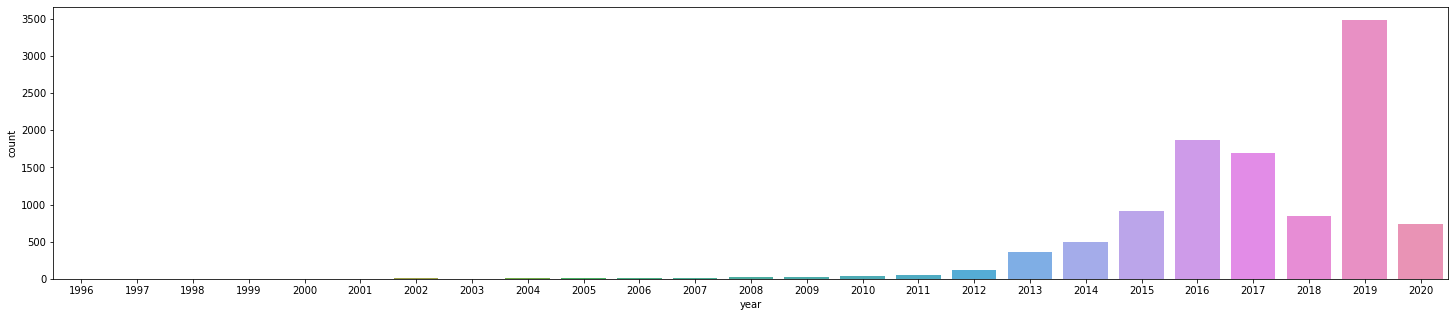

In [10]:
_, axes = plt.subplots(figsize=(25, 5))
sns.countplot(x='year', data=auto_data)

<AxesSubplot:>

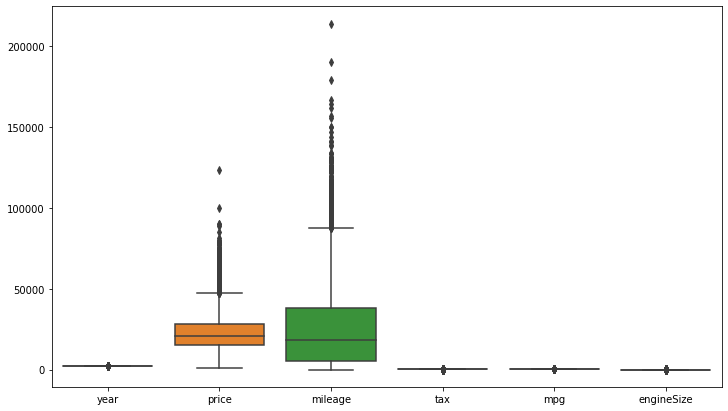

In [11]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=auto_data)

<AxesSubplot:xlabel='price'>

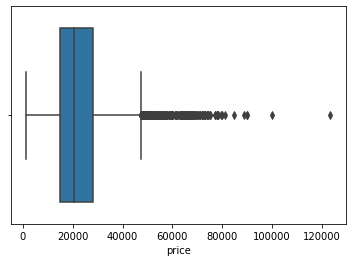

In [12]:
sns.boxplot(x='price',data=auto_data)

In [13]:
auto_data['price'].max()

123456

In [14]:
auto_data=auto_data[auto_data.price<120000]

In [15]:
auto_data['price'].max()

99950

<AxesSubplot:xlabel='mileage'>

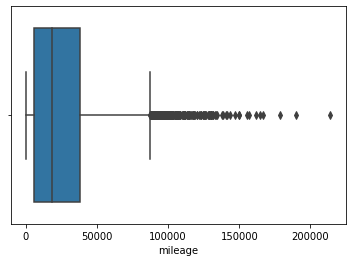

In [16]:
sns.boxplot(x='mileage',data=auto_data)

In [17]:
auto_data['mileage'].max()

214000

<AxesSubplot:xlabel='tax'>

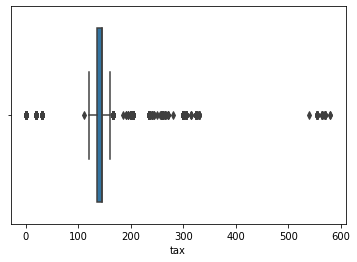

In [18]:
sns.boxplot(x='tax',data=auto_data)

<AxesSubplot:xlabel='tax'>

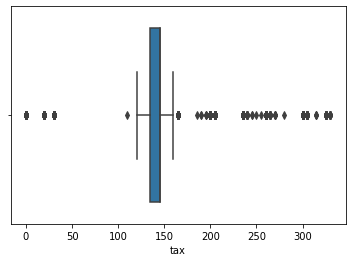

In [19]:
auto_data=auto_data[auto_data.tax<500]
sns.boxplot(x='tax',data=auto_data)

<AxesSubplot:xlabel='mpg'>

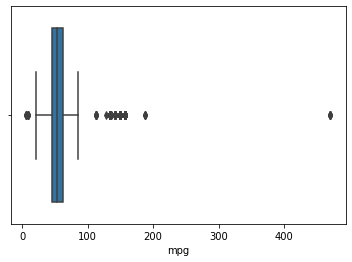

In [20]:
sns.boxplot(x='mpg',data=auto_data)

In [21]:
auto_data=auto_data[auto_data.mpg<300]

In [22]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000
mean,2017.101825,22740.433973,25381.275058,130.459523,54.834048,2.171437
std,2.323500,11394.114185,25129.919386,55.213791,17.139784,0.519981
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,1.500000
25%,2016.000000,14950.000000,5500.000000,135.000000,45.600000,2.000000
50%,2017.000000,20490.000000,18055.000000,145.000000,53.300000,2.000000
75%,2019.000000,27950.000000,38046.000000,145.000000,62.800000,2.000000
max,2020.000000,99950.000000,214000.000000,330.000000,188.300000,6.600000


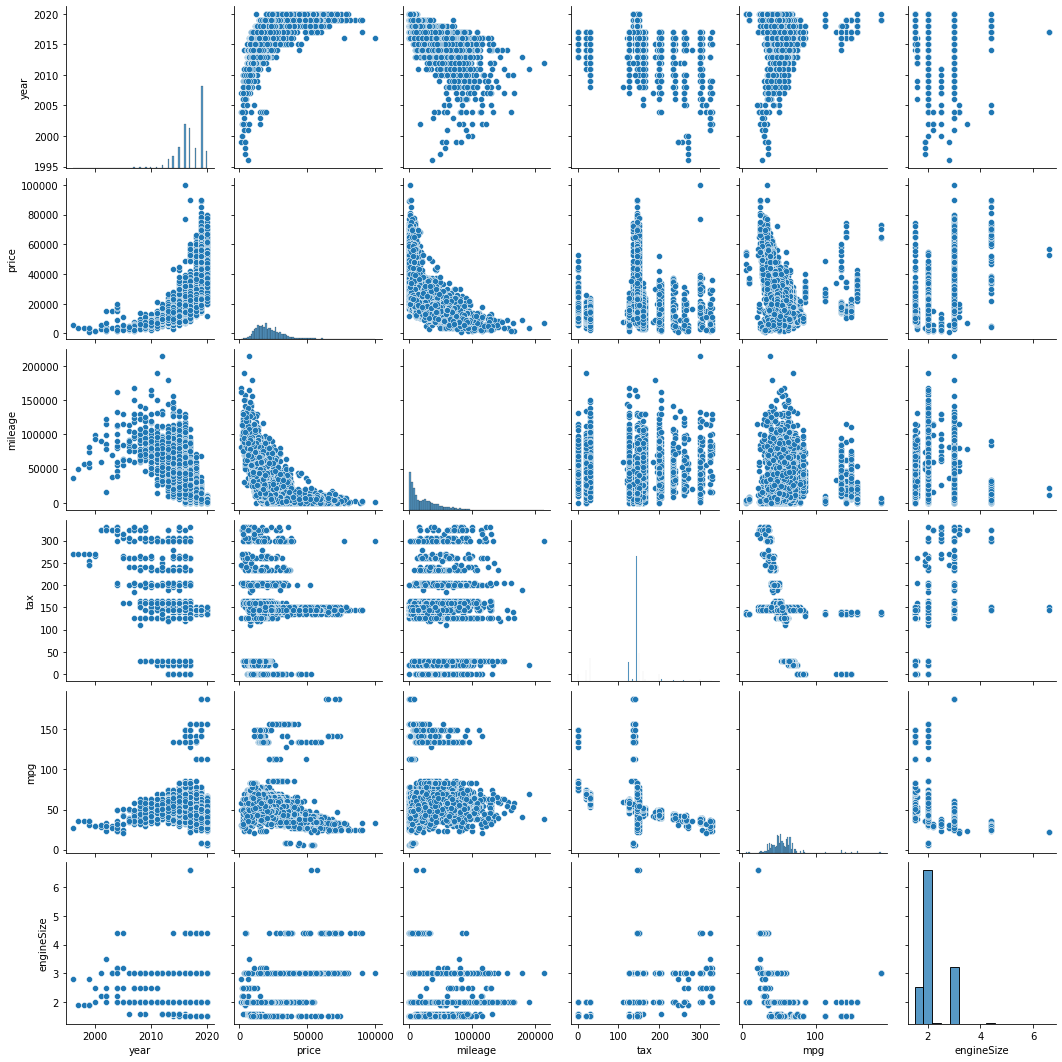

In [23]:
sns.pairplot(auto_data)

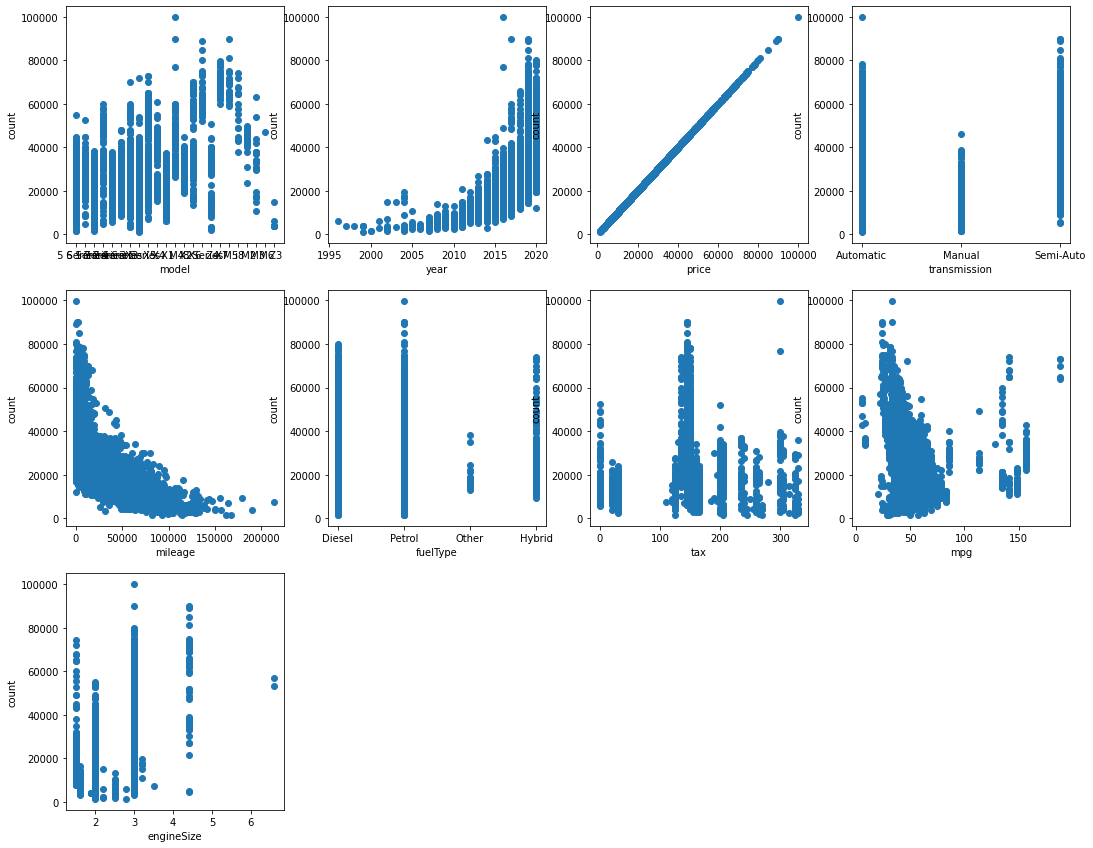

In [24]:
plt.figure(figsize=(18,20))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(auto_data[column], auto_data['price'])
    plt.xlabel(column)
    plt.ylabel('count')

Отделяем целевую переменную

In [25]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0


In [26]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [27]:
from sklearn import preprocessing

In [28]:
modelEnc = preprocessing.LabelEncoder()
X.model=modelEnc.fit_transform(X.model)


In [29]:
transmisEnc = preprocessing.LabelEncoder()
X.transmission=transmisEnc.fit_transform(X.transmission)


In [30]:
fuelEnc = preprocessing.LabelEncoder()
X.fuelType=transmisEnc.fit_transform(X.fuelType)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,0,67068,0,125,57.6,2.0
1,5,2018,0,14827,3,145,42.8,2.0
2,4,2016,0,62794,0,160,51.4,3.0
3,0,2017,0,26676,0,145,72.4,1.5
4,6,2014,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,15,2016,0,40818,0,150,54.3,2.0
10777,4,2016,0,42947,0,125,60.1,2.0
10778,2,2017,1,25468,3,200,42.8,2.0
10779,0,2014,0,45000,0,30,64.2,2.0


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape

((7479, 8), (3206, 8))

Стандартизация (вывод массив numpy)

In [32]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-0.5425666 ,  0.81612175,  1.02310877, ...,  0.27188528,
        -0.54205972, -0.33663189],
       [-0.37478955, -0.04520254, -0.12962255, ..., -1.82838822,
         0.50498784, -0.33663189],
       [-0.87812068, -0.04520254, -1.28235386, ...,  0.27188528,
        -0.01244846, -1.2871982 ],
       ...,
       [-0.37478955,  0.81612175, -1.28235386, ...,  0.27188528,
         0.68152492, -0.33663189],
       [ 1.30298088, -0.90652683, -0.12962255, ...,  0.545834  ,
        -0.18898554, -0.33663189],
       [ 1.47075793,  0.81612175, -1.28235386, ...,  0.27188528,
        -0.2498604 , -0.33663189]])

Обучили модель simple_LR

In [33]:
simple_LR = LinearRegression()
simple_LR.fit(X_train_scaled, Y_train)

LinearRegression()

Предсказание

In [34]:
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_predictions

array([  8621.33677408,  33675.52726212,  14449.23653265, ...,
        18271.25765002, -11131.09140297,  17454.90316195])

Проверка с MSE тк обучали с помощью MSE. Она - гладкая, но не интерпретируемая (это-квадрат)

In [35]:
simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 30496624.619


Берем корень, тк лучше с точки зрения соизмеримости с оригинальной
ошибкой

In [36]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 5522.375


In [37]:
print (f'Test std: {round(Y_test.std(),3)}')

Test std: 10867.444


Text(0, 0.5, 'Target')

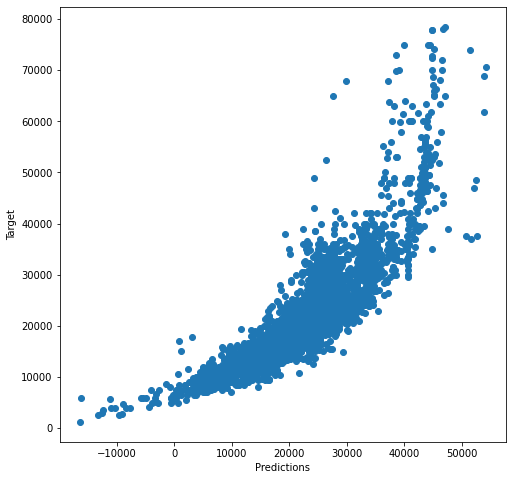

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [39]:
simple_LR.intercept_, simple_LR.coef_

(22863.232918839454,
 array([ 3579.48889687,  4630.35165378,   237.62599606, -2847.88196751,
          493.82945697,  -816.21407758,  -593.90587784,  4661.0034575 ]))

In [40]:
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,3579.488897
price,4630.351654
transmission,237.625996
mileage,-2847.881968
fuelType,493.829457
tax,-816.214078
mpg,-593.905878
engineSize,4661.003457


In [41]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions_Lasso = model.predict(X_test_scaled)

In [42]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_Lasso, squared=False), 3)}')



RMSE = 5522.165


Text(0, 0.5, 'Target')

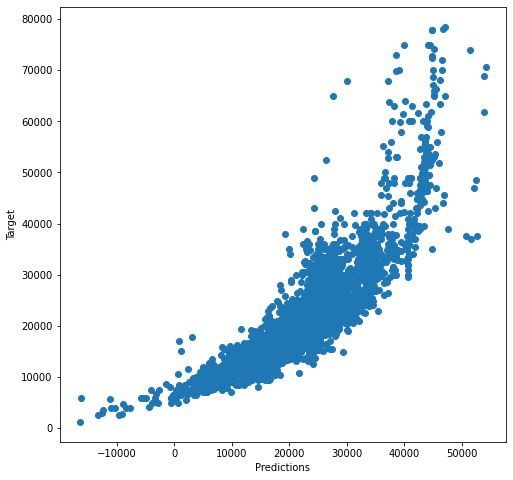

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions_Lasso, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [44]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions_LassoCV = model.predict(X_test_scaled)

In [45]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_LassoCV, squared=False), 3)}')



RMSE = 5520.851


Text(0, 0.5, 'Target')

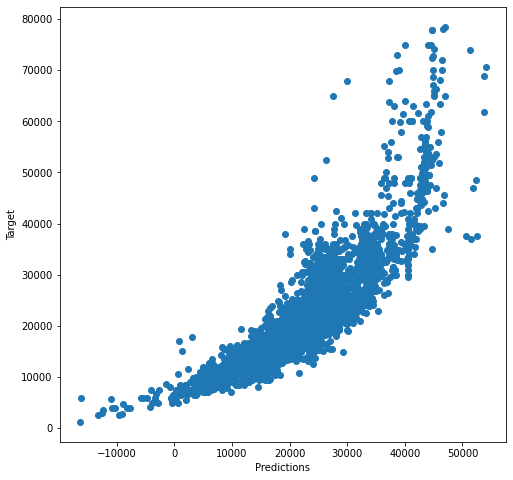

In [46]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions_LassoCV, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [47]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions_Ridge = model.predict(X_test_scaled)

In [48]:
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_Ridge, squared=False), 3)}')



RMSE = 5522.374


Text(0, 0.5, 'Target')

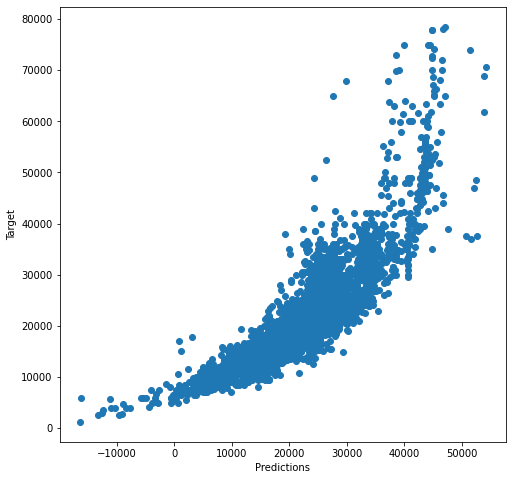

In [49]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions_Ridge, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [50]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions_RidgeCV = model.predict(X_test_scaled)

In [51]:


print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_RidgeCV, squared=False), 3)}')



RMSE = 5522.371


Text(0, 0.5, 'Target')

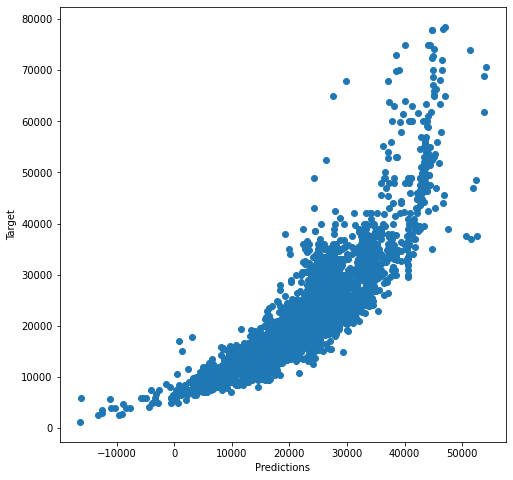

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions_RidgeCV, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [53]:
alphas = np.linspace(1, 10, 100)
alphas

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [54]:
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

RMSE = 5522.146


,Coefficients
year,3578.197974
price,4630.683600
transmission,236.840492
mileage,-2846.789222
fuelType,492.162952
tax,-812.972143
mpg,-593.104566
engineSize,4659.349047


Добавим категориальные переменные в даммис

In [55]:
auto_data_dummy = pd.concat([auto_data.drop('model', axis=1), 
                             pd.get_dummies(auto_data['model'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('transmission', axis=1), 
                             pd.get_dummies(auto_data['transmission'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('fuelType', axis=1), 
                             pd.get_dummies(auto_data['fuelType'])], axis = 1)
auto_data_dummy.head()

,year,price,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,...,Z3,Z4,i8,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [56]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model = LassoCV(alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')



RMSE = 4650.079


In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')



RMSE = 2555.2


Text(0, 0.5, 'Target')

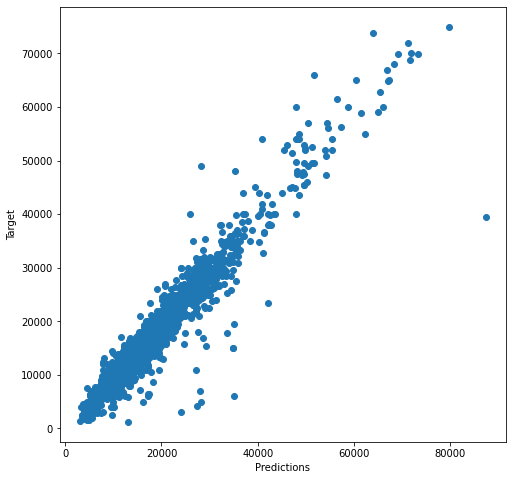

In [58]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')